In [2]:
import pandas as pd
import numpy as np

rating = pd.read_csv('ratings.csv')

rating.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [12]:
links = pd.read_csv('links.csv')

links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [13]:
genome_score = pd.read_csv('genome-scores.csv')

genome_score.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [3]:
movie = pd.read_csv('movies.csv')

movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [16]:
tags = pd.read_csv('tags.csv')

tags.head(10)

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455
5,4,44665,unreliable narrators,1573943619
6,4,115569,tense,1573943077
7,4,115713,artificial intelligence,1573942979
8,4,115713,philosophical,1573943033
9,4,115713,tense,1573943042


In [4]:
df1 = rating[['userId', 'movieId', 'rating']]

train_data = pd.merge(df1, movie, on='movieId')
train_data.head()

,userId,movieId,rating,title,genres
0,1,296,5.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,3,296,5.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,4,296,4.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,5,296,4.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,7,296,4.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


# Exploring the Data Distribution

Text(0, 0.5, 'Rating')

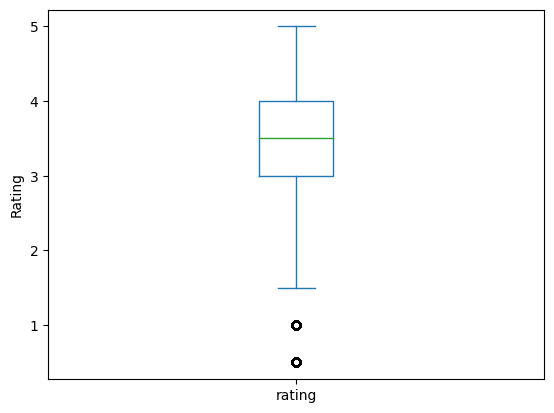

In [7]:
ax = (train_data['rating']).plot.box()
ax.set_ylabel('Rating')

In [11]:
train_data['rating'].value_counts()

rating
4.0    6639798
3.0    4896928
5.0    3612474
3.5    3177318
4.5    2200539
2.0    1640868
2.5    1262797
1.0     776815
1.5     399490
0.5     393068
Name: count, dtype: int64

In [38]:
# Split the genres column into a list of individual genres.
genres_first_level = train_data['genres'].str.split('|')

genres_list = []

for first_level in genres_first_level:
    for genre in first_level:
        if genre not in genres_list:
            genres_list.append(genre)          

for genre in genres_list:
    train_data[genre] = 0

for i in range(0, len(genres_first_level)):
    temp = genres_first_level[i]
    for genre in temp:
        train_data.loc[i, genre] = 1

train_data.head()

,userId,movieId,rating,title,genres,Musical,IMAX,(no genres listed),Western,Thriller,...,Adventure,Documentary,Crime,War,Mystery,Sci-Fi,Drama,Children,Fantasy,Film-Noir
0,1,296,5.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
1,3,296,5.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
2,4,296,4.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3,5,296,4.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,7,296,4.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [53]:
genres_count = {}

for genre in genres_list:
    genres_count[genre] = 0

for genre in genres_list:
    value_counts = train_data[genre].value_counts()
    value_to_count = 1
    count_of_value = value_counts.get(value_to_count)
    genres_count[genre] = count_of_value
    
genres_count

{'Comedy': 8926230,
 'Crime': 4190259,
 'Drama': 10962833,
 'Thriller': 6763272,
 'War': 1267346,
 'Musical': 964252,
 'Romance': 4497291,
 'Adventure': 5832424,
 'Film-Noir': 247227,
 'Sci-Fi': 4325740,
 'Western': 483731,
 'Fantasy': 2831585,
 'Mystery': 2010995,
 'Children': 2124258,
 'Action': 7446918,
 'Documentary': 322449,
 'Animation': 1630987,
 'Horror': 1892183,
 'IMAX': 1063279,
 '(no genres listed)': 26627}

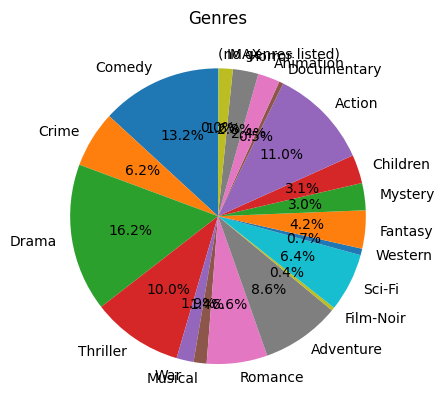

<Figure size 4000x4000 with 0 Axes>

In [74]:
import matplotlib.pyplot as plt

values = genres_count.values()
labels = genres_count.keys()

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title (optional)
plt.title('Genres')

plt.figure(figsize=(40, 40))

# Show the plot
plt.show()

We can notice a several dominant genres - comedy, drama, thriller, action

Text(0.5, 0, 'Rating')

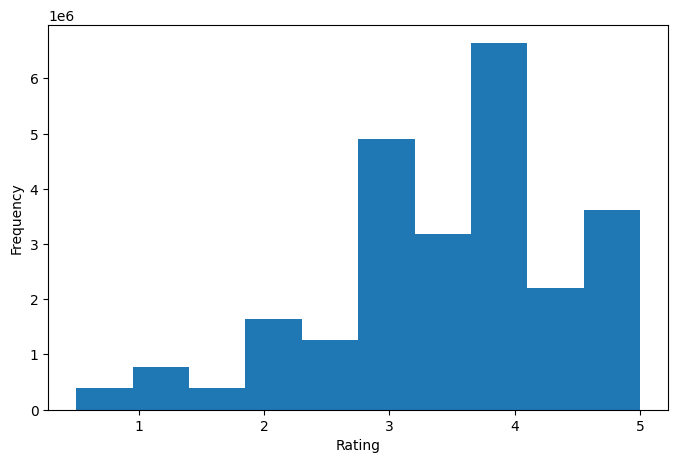

In [78]:
ax = train_data['rating'].plot.hist(figsize=(8, 5))
ax.set_xlabel('Rating')

We can notice that it is more common to rate a film as a good or passable